In [1]:
url = 'serach kernel density estimates in wikipedia'

In [2]:
# The normal imports
import numpy as np
from numpy.random import randn
import pandas as pd
#import the stats library from numpy
from scipy import stats
#These are the plotting modules adn libraries we'll use
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
#Command so that plots appear in the iPython Notebook
%matplotlib inline

In [3]:
dataset = randn(35)
dataset

array([ 0.2224362 , -0.865654  , -0.1308179 ,  0.47819548, -0.63927812,
       -1.54208162, -0.75007069, -0.07598724,  0.65140335, -0.21342876,
        1.84495808,  0.06088347,  0.16388293,  0.60788413, -0.06221935,
        0.54001321,  1.21547874,  0.49852434, -0.35936521,  1.09010098,
       -0.30930209,  0.58591605,  0.61533786, -0.03870068, -1.03558692,
        1.45028145, -0.53169445,  0.57668507,  0.33582185, -0.44544055,
       -0.7751034 ,  1.21771024, -1.01829389,  0.14430978,  0.57187351])

(0, 1)

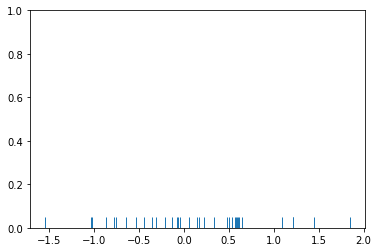

In [4]:
sns.rugplot(dataset)
#Signature: plt.ylim(*args, **kwargs)
#Docstring:
#Get or set the y-limits of the current axes.
#start with a rugplot or a carpet plot
plt.ylim(0,1)

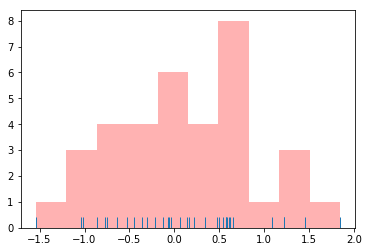

In [5]:
plt.hist(dataset,alpha=0.3,color='red')
sns.rugplot(dataset)

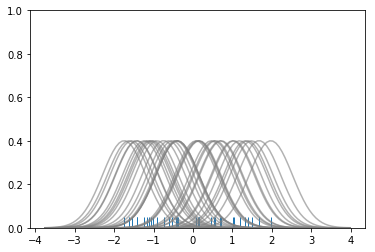

In [31]:
sns.rugplot(dataset)
x_min = dataset.min()-2
x_max = dataset.max()+2
x_axis = np.linspace(x_min,x_max,100)
#please reference in the wikipedia
bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**0.2
kernel_list = []
for data_point in dataset:
    #create a kernel for each point and append it to the kernel_list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    #.norm(): normal distributed
    #.pdf():probability density function
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * 0.4
    
    plt.plot(x_axis,kernel,color='gray',alpha=0.6)
    plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of the basis functions')

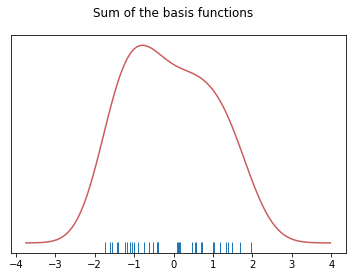

In [36]:
sum_of_kde = np.sum(kernel_list,axis=0)
fig = plt.plot(x_axis,sum_of_kde,color='indianred')
sns.rugplot(dataset)
plt.yticks([])
plt.suptitle("Sum of the basis functions")

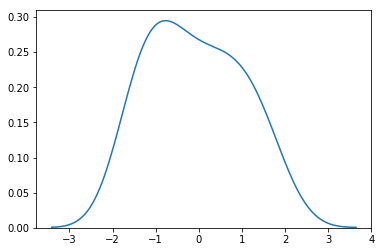

In [38]:
sns.kdeplot(dataset)
#all of the above steps can be done by seaborn just by one step. Seaborn can do a kernel density estimation plot just
# in one simple go.
#default the bandwidth

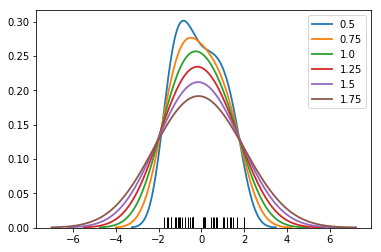

In [40]:
sns.rugplot(dataset,color='black')
for bw in np.arange(0.5,2,0.25):
    sns.kdeplot(dataset,bw=bw,lw=1.8,label=bw)
#.arange(a,b,c): start from a, end at b and step will be c.
#bw is bandwidth
#set the bandwidth ourselves to make it less or high frequency to our dataset

In [41]:
url= 'http://en.wikipedia.org/wiki/Kernel_(statistics)'
# if you are a little fuzzy about that, check the url above

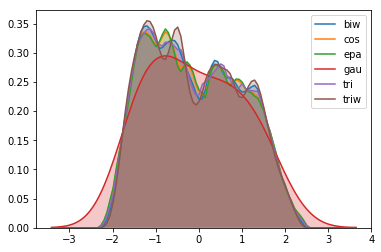

In [45]:
kernel_options = ['biw','cos','epa','gau','tri','triw']
for kern in kernel_options:
    sns.kdeplot(dataset,kernel=kern,label=kern,shade=True)

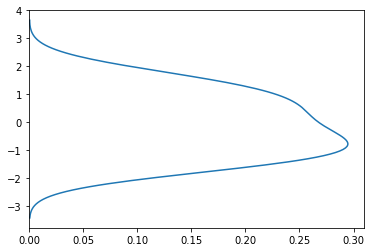

In [46]:
sns.kdeplot(dataset,vertical=True)

In [47]:
url = 'http://en.wikipedia.org/wiki/Cumulative_distribution_function'

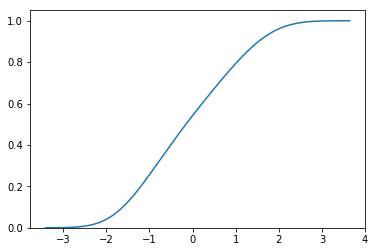

In [48]:
#Cumulative Distribution Function
sns.kdeplot(dataset,cumulative= True)

In [49]:
mean = [0,0]
cov = [[1,0],[0,100]]

D:\Users\gaoxi\Anaconda3\lib\site-packages\seaborn\distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


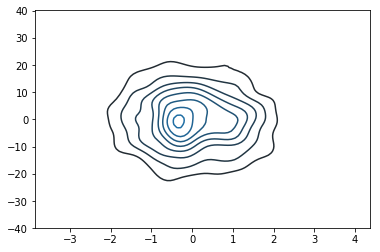

In [54]:
dataset2 = np.random.multivariate_normal(mean,cov,1000)
#draw random samples from a multivariate normal distribution
dframe = pd.DataFrame(dataset2,columns=['x','y'])
sns.kdeplot(dframe)
#multi variate density estimation

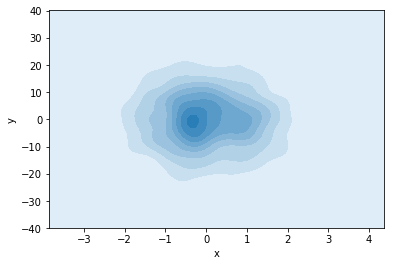

In [59]:
sns.kdeplot(dframe.x,dframe.y,shade=True)

D:\Users\gaoxi\Anaconda3\lib\site-packages\seaborn\distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


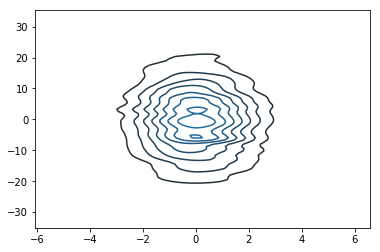

In [61]:
sns.kdeplot(dframe,bw=1)

D:\Users\gaoxi\Anaconda3\lib\site-packages\seaborn\distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


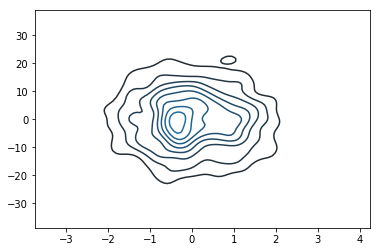

In [62]:
sns.kdeplot(dframe,bw='silverman')

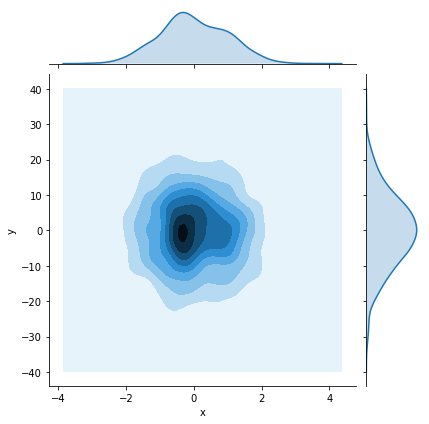

In [64]:
sns.jointplot('x','y',dframe,kind='kde')